# Automobile Sales Fluctuation Analysis

## Part 1: Data Visualizations

This notebook contains all the visualization tasks for the automobile sales analysis assignment.

### Import Required Libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create figure size settings
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

### Load and Explore Data

In [13]:
# Load the automobile sales data
df = pd.read_csv('data/historical_automobile_sales.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (528, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     528 non-null    datetime64[ns]
 1   Year                     528 non-null    int64         
 2   Month                    528 non-null    object        
 3   Recession                528 non-null    int64         
 4   Consumer_Confidence      528 non-null    float64       
 5   Seasonality_Weight       528 non-null    float64       
 6   Price                    528 non-null    float64       
 7   Advertising_Expenditure  528 non-null    int64         
 8   Competition              528 non-null    int64         
 9   GDP                      528 non-null    float64       
 10  Growth_Rate              528 non-null    float64       
 11  unemployment_rate        528 non-null    float64       
 

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1980-01-31,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,1980-02-29,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,1980-03-31,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,1980-04-30,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,1980-05-31,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


---

## Task 1.1: Line Chart - Automobile Sales Fluctuation Year to Year

*Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year.*

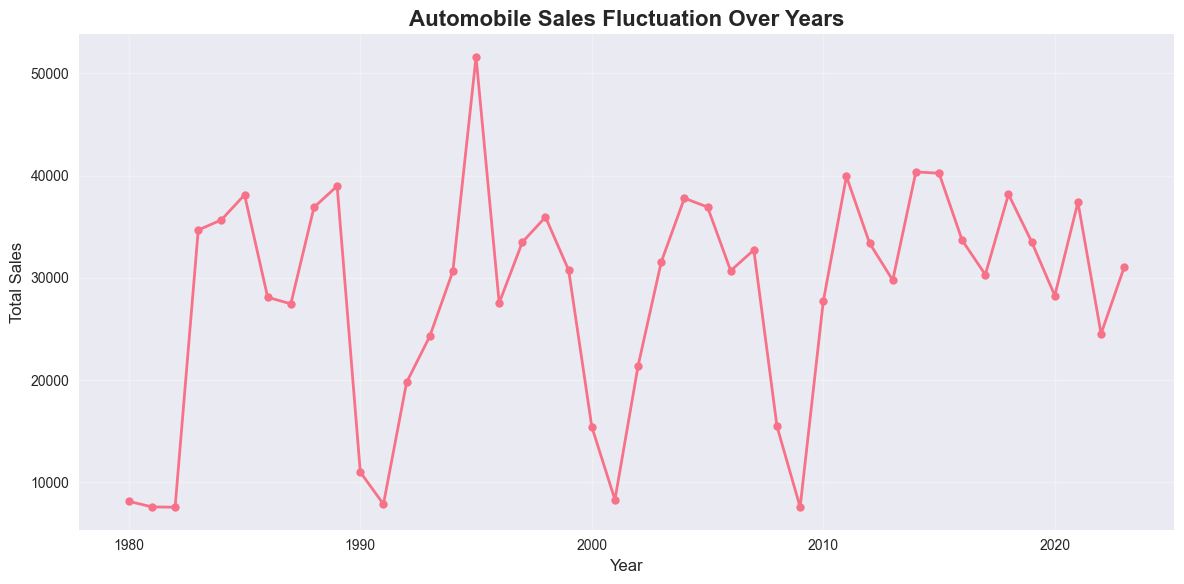

Task 1.1 completed: Line_plot_1.png saved


In [14]:
# Task 1.1: Line chart showing automobile sales fluctuation year to year
plt.figure(figsize=(12, 6))

# Group by year and sum sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Create line plot using pandas
yearly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Automobile Sales Fluctuation Over Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('images/Line_plot_1.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.1 completed: Line_plot_1.png saved")

# Automobile Sales Fluctuation Analysis
## Part 1: Data Visualizations

This notebook contains all the visualization tasks for the automobile sales analysis assignment.

---

## Task 1.2: Multi-Line Chart - Vehicle Type Sales Trends During Recession

*Plot different lines for categories of vehicle type and analyse the trend to answer the question "Is there a noticeable difference in sales trends between different vehicle types during recession periods?"*

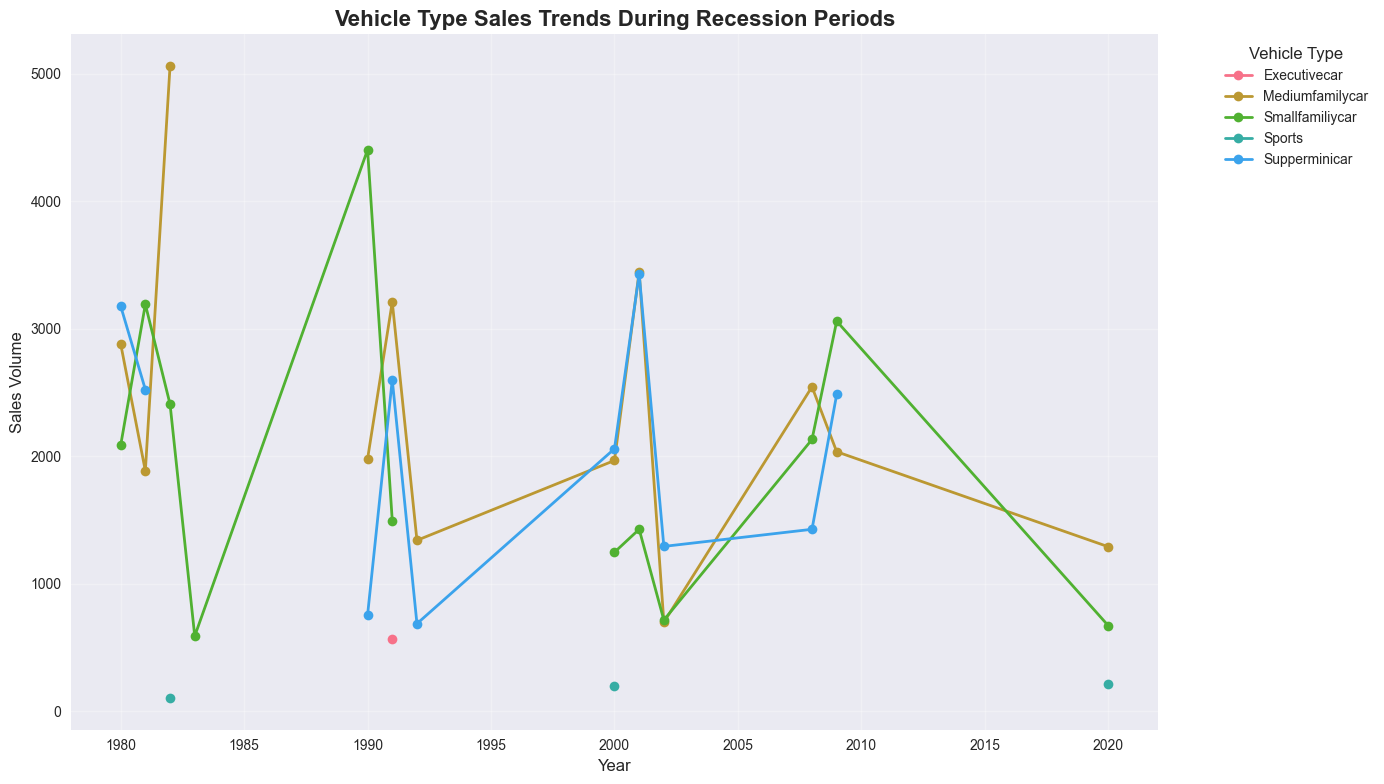

Task 1.2 completed: Line_plot_2.png saved

Analysis: Compare the trends above to answer if there's a noticeable difference in sales trends between vehicle types during recession.


In [15]:
# Task 1.2: Multi-line chart for vehicle type sales trends during recession
plt.figure(figsize=(14, 8))

# Filter data for recession periods
recession_data = df[df['Recession'] == 1]

# Group by year and vehicle type
vehicle_sales = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Plot lines for each vehicle type
for vehicle_type in vehicle_sales.columns:
    plt.plot(vehicle_sales.index, vehicle_sales[vehicle_type], 
             marker='o', linewidth=2, label=vehicle_type)

plt.title('Vehicle Type Sales Trends During Recession Periods', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('images/Line_plot_2.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.2 completed: Line_plot_2.png saved")
print("\nAnalysis: Compare the trends above to answer if there's a noticeable difference in sales trends between vehicle types during recession.")

---

## Task 1.3: Seaborn Bar Chart - Recession vs Non-Recession Sales Comparison

*Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.*

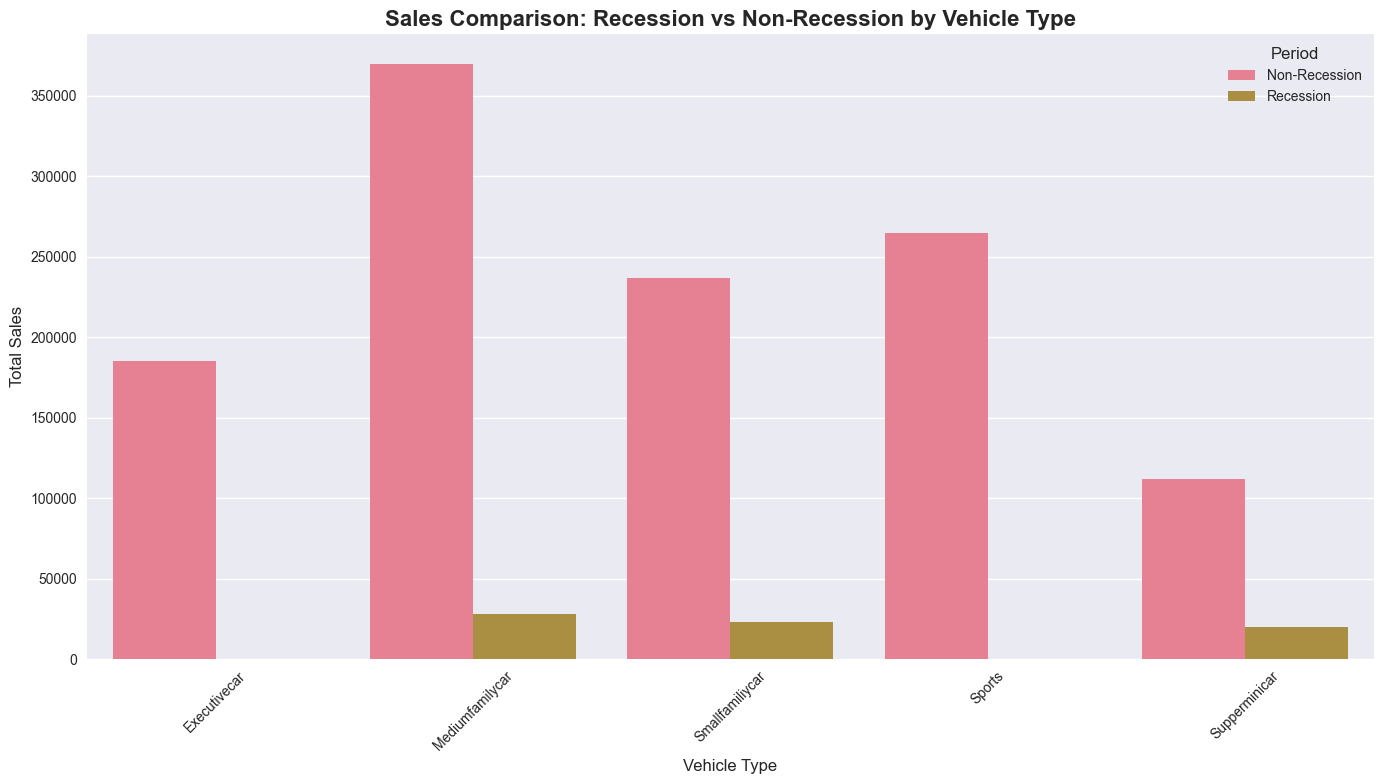

Task 1.3 completed: Bar_Chart.png saved


In [16]:
# Task 1.3: Seaborn bar chart comparing recession vs non-recession sales by vehicle type
plt.figure(figsize=(14, 8))

# Create recession period labels
df['Period'] = df['Recession'].map({1: 'Recession', 0: 'Non-Recession'})

# Group data by vehicle type and period
comparison_data = df.groupby(['Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

# Create seaborn bar plot
sns.barplot(data=comparison_data, x='Vehicle_Type', y='Automobile_Sales', hue='Period')
plt.title('Sales Comparison: Recession vs Non-Recession by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Period')
plt.tight_layout()

# Save the plot
plt.savefig('images/Bar_Chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.3 completed: Bar_Chart.png saved")

---

## Task 1.4: Subplot - GDP Variations During Recession and Non-Recession

*Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.*

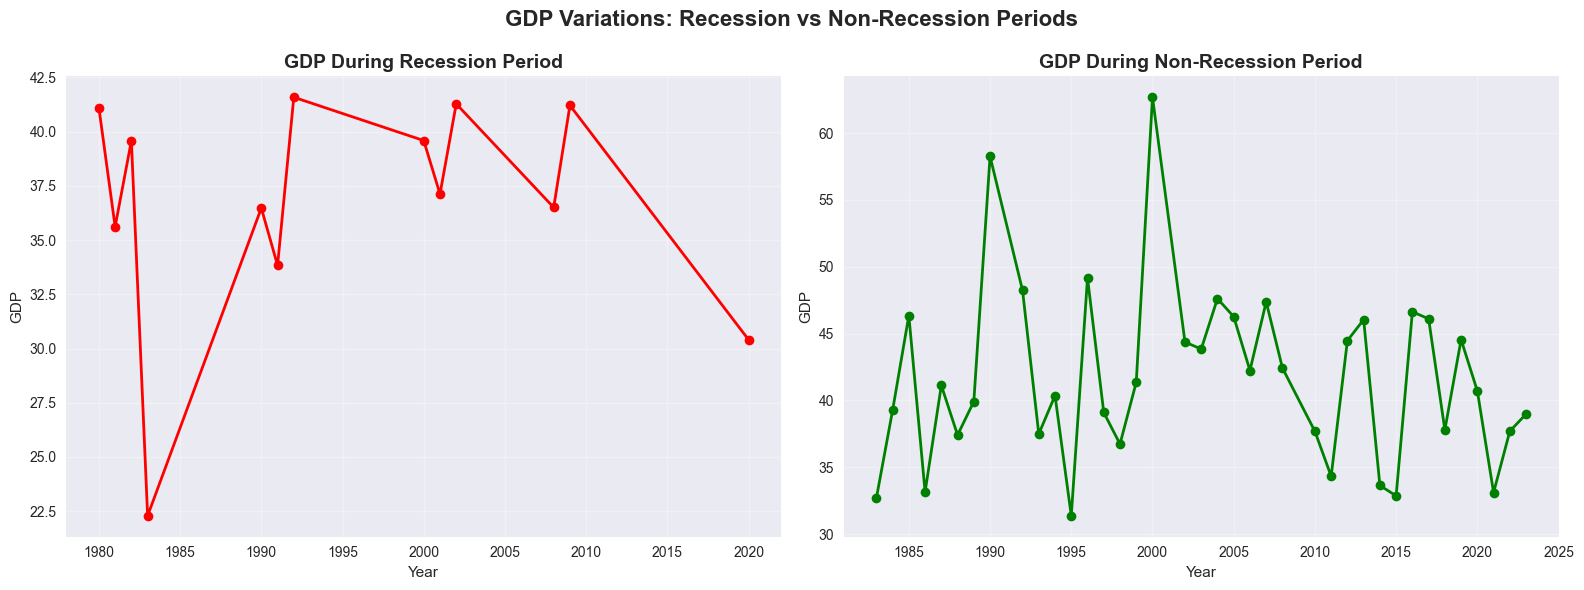

Task 1.4 completed: Subplot.png saved


In [17]:
# Task 1.4: Subplot comparing GDP variations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Recession period GDP
recession_gdp = df[df['Recession'] == 1].groupby('Year')['GDP'].mean()
ax1.plot(recession_gdp.index, recession_gdp.values, marker='o', color='red', linewidth=2)
ax1.set_title('GDP During Recession Period', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.grid(True, alpha=0.3)

# Non-recession period GDP
non_recession_gdp = df[df['Recession'] == 0].groupby('Year')['GDP'].mean()
ax2.plot(non_recession_gdp.index, non_recession_gdp.values, marker='o', color='green', linewidth=2)
ax2.set_title('GDP During Non-Recession Period', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.grid(True, alpha=0.3)

plt.suptitle('GDP Variations: Recession vs Non-Recession Periods', fontsize=16, fontweight='bold')
plt.tight_layout()

# Save the plot
plt.savefig('images/Subplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.4 completed: Subplot.png saved")

---

## Task 1.5: Bubble Plot - Seasonality Impact on Automobile Sales

*Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.*

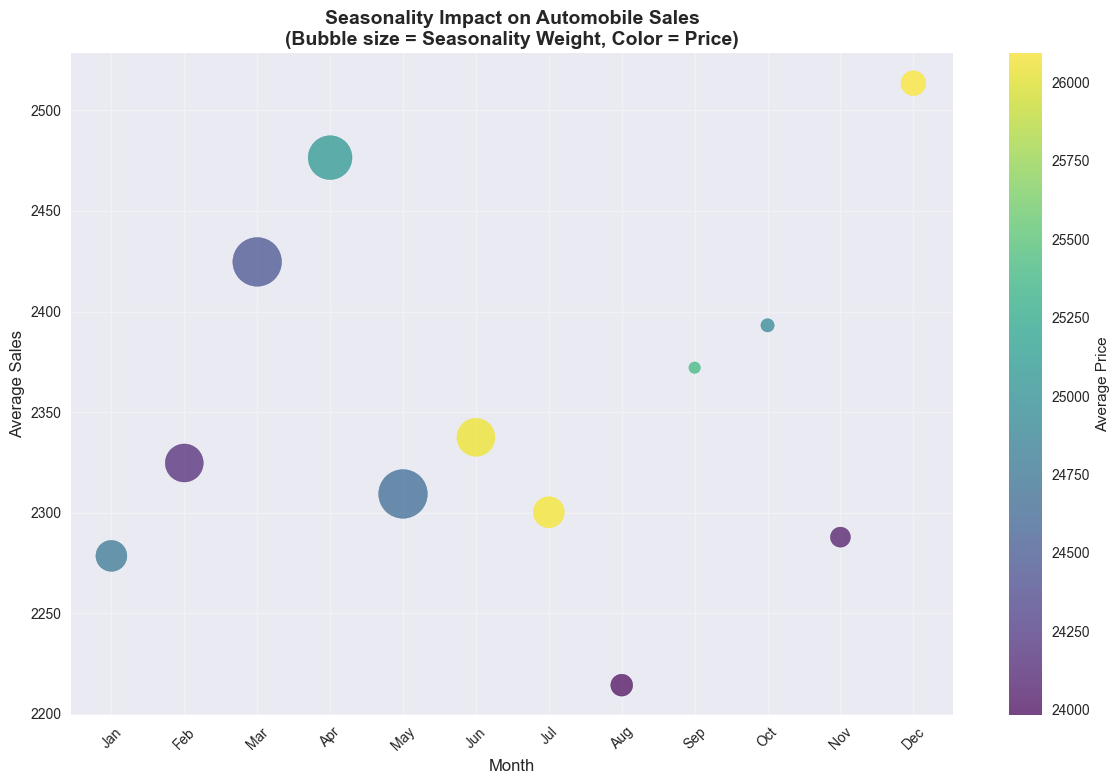

Task 1.5 completed: Bubble.png saved


In [18]:
# Task 1.5: Bubble plot for seasonality impact
plt.figure(figsize=(12, 8))

# Group by month and calculate seasonality metrics
seasonal_data = df.groupby('Month').agg({
    'Automobile_Sales': 'mean',
    'Price': 'mean',
    'Seasonality_Weight': 'mean'
}).reset_index()

# Create month order for proper display
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasonal_data['Month'] = pd.Categorical(seasonal_data['Month'], categories=month_order, ordered=True)
seasonal_data = seasonal_data.sort_values('Month')

# Create bubble plot
plt.scatter(seasonal_data['Month'], seasonal_data['Automobile_Sales'], 
           s=seasonal_data['Seasonality_Weight']*1000, 
           c=seasonal_data['Price'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Average Price')
plt.title('Seasonality Impact on Automobile Sales\n(Bubble size = Seasonality Weight, Color = Price)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('images/Bubble.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.5 completed: Bubble.png saved")

---

## Task 1.6: Scatter Plot - Price vs Sales Correlation During Recession

*Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.*

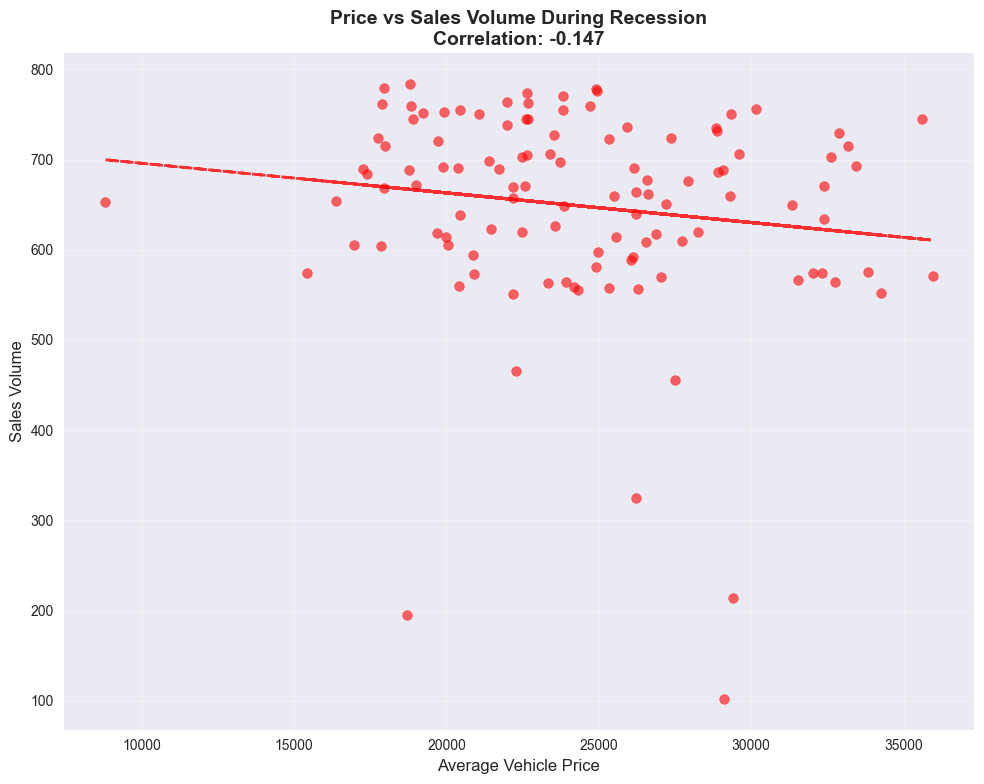

Task 1.6 completed: Scatter.png saved
Correlation coefficient: -0.147


In [19]:
# Task 1.6: Scatter plot for price vs sales correlation during recession
plt.figure(figsize=(10, 8))

# Filter recession data
recession_data = df[df['Recession'] == 1]

# Create scatter plot
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'], 
           alpha=0.6, s=50, c='red')

# Add trend line
z = np.polyfit(recession_data['Price'], recession_data['Automobile_Sales'], 1)
p = np.poly1d(z)
plt.plot(recession_data['Price'], p(recession_data['Price']), "r--", alpha=0.8, linewidth=2)

# Calculate correlation
correlation = recession_data['Price'].corr(recession_data['Automobile_Sales'])
plt.title(f'Price vs Sales Volume During Recession\nCorrelation: {correlation:.3f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Average Vehicle Price', fontsize=12)
plt.ylabel('Sales Volume', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('images/Scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.6 completed: Scatter.png saved")
print(f"Correlation coefficient: {correlation:.3f}")

---

## Task 1.7: Pie Chart - XYZAutomotives Advertising Expenditure by Period

*Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.*

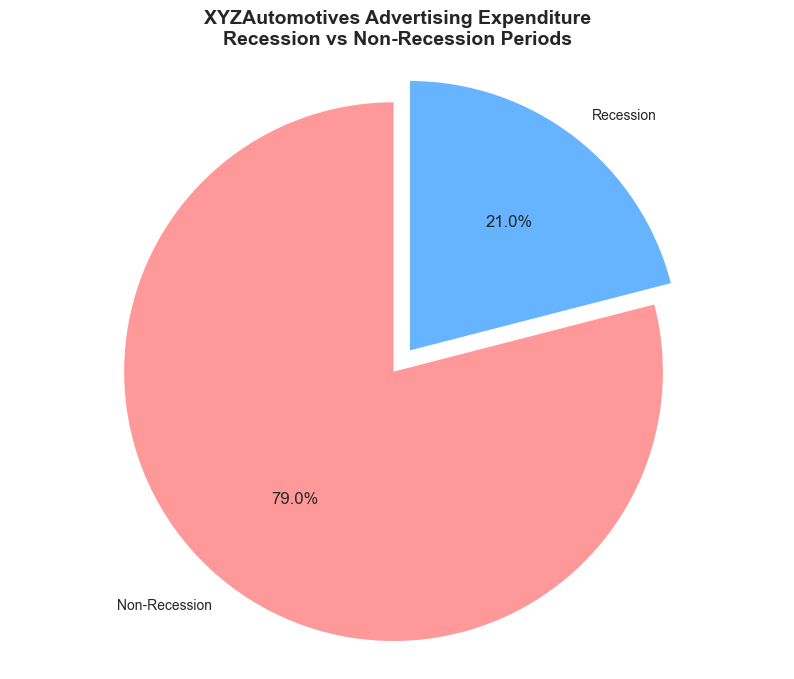

Task 1.7 completed: Pie_1.png saved


In [20]:
# Task 1.7: Pie chart for advertising expenditure by period
plt.figure(figsize=(10, 8))

# Calculate advertising expenditure by period
period_expenditure = df.groupby('Period')['Advertising_Expenditure'].sum()

# Create pie chart
colors = ['#ff9999', '#66b3ff']
plt.pie(period_expenditure.values, labels=period_expenditure.index, 
        autopct='%1.1f%%', startangle=90, colors=colors, explode=(0.05, 0.05))
plt.title('XYZAutomotives Advertising Expenditure\nRecession vs Non-Recession Periods', 
          fontsize=14, fontweight='bold')
plt.axis('equal')

# Save the plot
plt.savefig('images/Pie_1.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.7 completed: Pie_1.png saved")

---

## Task 1.8: Pie Chart - Advertising Expenditure by Vehicle Type During Recession

*Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.*

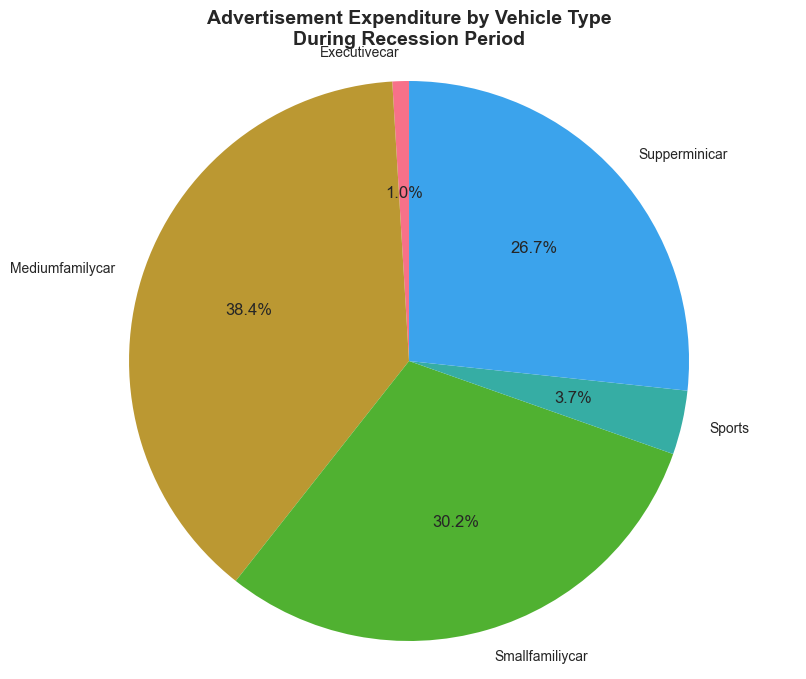

Task 1.8 completed: Pie_2.png saved


In [21]:
# Task 1.8: Pie chart for advertising expenditure by vehicle type during recession
plt.figure(figsize=(10, 8))

# Filter recession data and group by vehicle type
recession_ad_expenditure = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart
plt.pie(recession_ad_expenditure.values, labels=recession_ad_expenditure.index, 
        autopct='%1.1f%%', startangle=90)
plt.title('Advertisement Expenditure by Vehicle Type\nDuring Recession Period', 
          fontsize=14, fontweight='bold')
plt.axis('equal')

# Save the plot
plt.savefig('images/Pie_2.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.8 completed: Pie_2.png saved")

---

## Task 1.9: Line Plot - Unemployment Rate Effect on Vehicle Sales During Recession

*Develop a line plot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.*

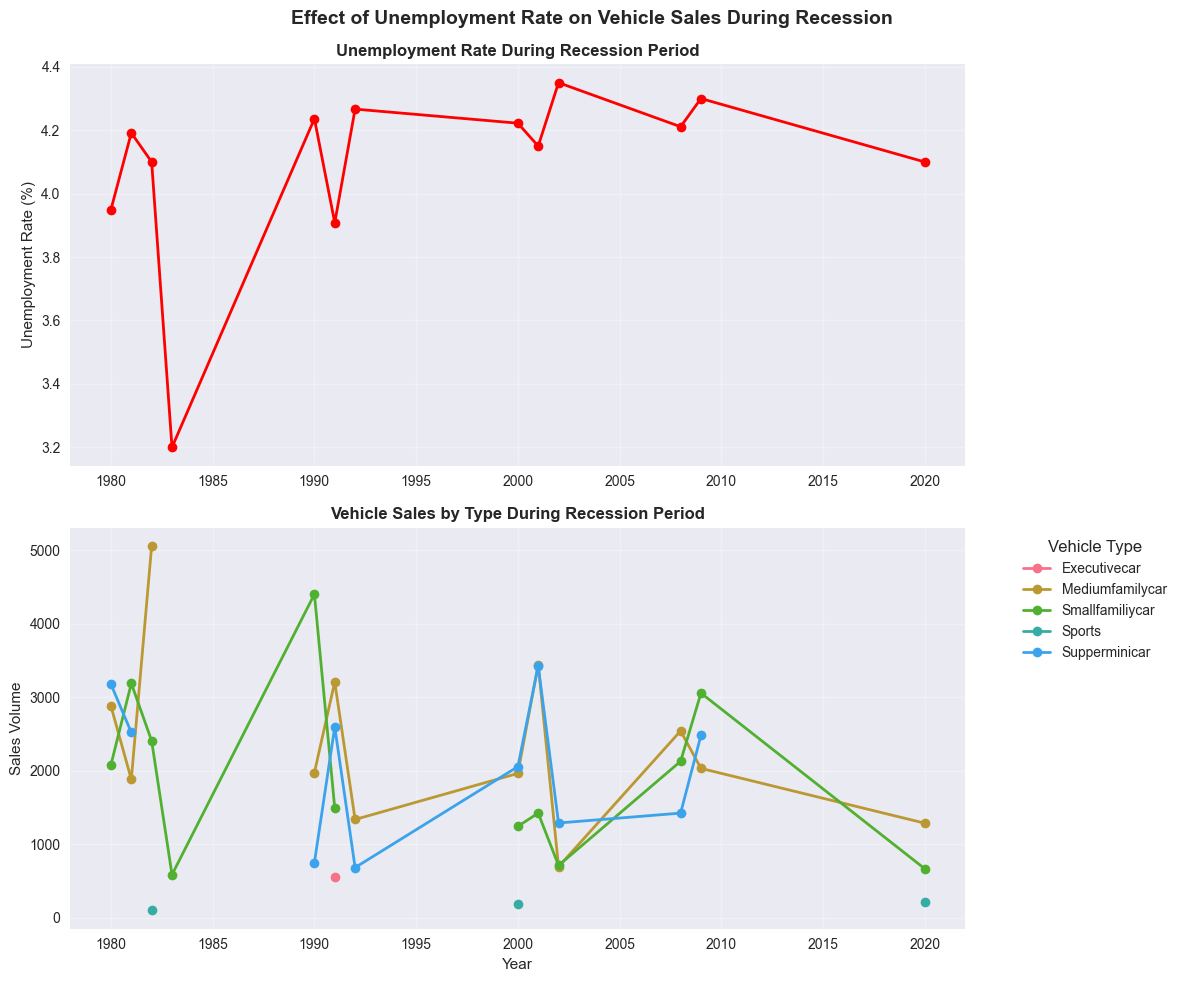

Task 1.9 completed: Line_plot_3.png saved


In [22]:
# Task 1.9: Line plot for unemployment rate effect during recession
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Filter recession data
recession_data = df[df['Recession'] == 1]

# Plot 1: Unemployment rate over time during recession
unemployment_by_year = recession_data.groupby('Year')['unemployment_rate'].mean()
ax1.plot(unemployment_by_year.index, unemployment_by_year.values, 
         marker='o', color='red', linewidth=2)
ax1.set_title('Unemployment Rate During Recession Period', fontsize=12, fontweight='bold')
ax1.set_ylabel('Unemployment Rate (%)')
ax1.grid(True, alpha=0.3)

# Plot 2: Sales by vehicle type during recession
vehicle_sales_recession = recession_data.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()
for vehicle_type in vehicle_sales_recession.columns:
    ax2.plot(vehicle_sales_recession.index, vehicle_sales_recession[vehicle_type], 
             marker='o', linewidth=2, label=vehicle_type)

ax2.set_title('Vehicle Sales by Type During Recession Period', fontsize=12, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Sales Volume')
ax2.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

plt.suptitle('Effect of Unemployment Rate on Vehicle Sales During Recession', 
             fontsize=14, fontweight='bold')
plt.tight_layout()

# Save the plot
plt.savefig('images/Line_plot_3.png', dpi=300, bbox_inches='tight')
plt.show()

print("Task 1.9 completed: Line_plot_3.png saved")

---

## Summary

All Part 1 visualization tasks have been completed. The generated images are saved in the `images/` directory with the exact naming convention required for submission:

1. **Line_plot_1.png** - Automobile sales fluctuation over years
2. **Line_plot_2.png** - Vehicle type sales trends during recession
3. **Bar_Chart.png** - Recession vs non-recession sales comparison
4. **Subplot.png** - GDP variations during different periods
5. **Bubble.png** - Seasonality impact on sales
6. **Scatter.png** - Price vs sales correlation during recession
7. **Pie_1.png** - Advertising expenditure by period
8. **Pie_2.png** - Advertising expenditure by vehicle type during recession
9. **Line_plot_3.png** - Unemployment rate effect on vehicle sales

The analysis uses the historical automobile sales dataset with proper column names and data structure.